In [24]:
import torch
from torch import optim
import torchvision
from networkx.algorithms.clique import enumerate_all_cliques
from torchvision import transforms
import matplotlib.pyplot as plt
from collections import Counter
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import random_split


In [25]:
# Params
batch_size = 256
n_class = 10
lr = 0.001
num_epochs = 5


In [26]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

train_len = int(len(train_dataset) * 0.9)
val_len = len(train_dataset) - train_len

train_dataset, valid_dataset = random_split(
    train_dataset,
    [train_len, val_len],
    generator=torch.Generator().manual_seed(42)  # You can change the seed
)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

number of train samples: 54000
number of test samples: 10000
img: torch.Size([1, 28, 28])
label: 6


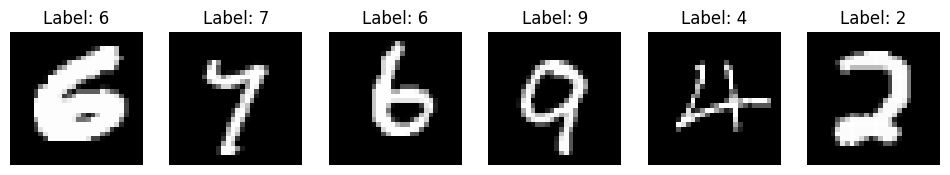

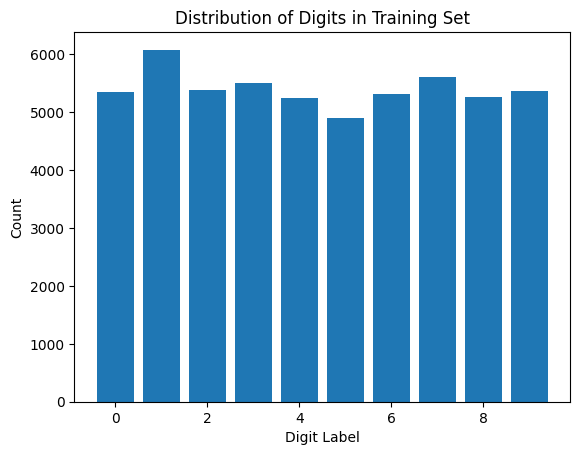

In [27]:
print(f"number of train samples: {len(train_dataset)}")
print(f"number of test samples: {len(test_dataset)}")

img, label = train_dataset[0]
print(f"img: {img.shape}")
print(f"label: {label}")

# Show a few images
def show_images(dataset, n=6):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        image, lbls = dataset[i]
        plt.subplot(1, n, i+1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {lbls}")
        plt.axis('off')
    plt.show()

show_images(train_dataset)

labels = [label for _, label in train_dataset]
counter = Counter(labels)

# Plot the label distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Set')
plt.show()


In [28]:
n_class = 10

class convnet(nn.Module):
    def __init__(self):
        super(convnet, self).__init__()

        # Step 1: Define convolutional layers first
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Step 2: Use those layers to compute flattened size
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy = self.layer1(dummy)
            dummy = self.layer2(dummy)
            self.flattened_size = dummy.view(1, -1).shape[1]
        print("Flattened size:", self.flattened_size)

        # Step 3: Define FC layer with correct input size
        self.fc = nn.Linear(self.flattened_size, n_class)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



Flattened size: 2048
epoch: [1/5] | step: [1/211] | loss: 2.425921
epoch: [1/5] | step: [51/211] | loss: 0.185942
epoch: [1/5] | step: [101/211] | loss: 0.180873
epoch: [1/5] | step: [151/211] | loss: 0.117276
epoch: [1/5] | step: [201/211] | loss: 0.104450
Epoch [1/5] | Val Loss: 0.0917 | Val Acc: 97.45%
epoch: [2/5] | step: [1/211] | loss: 0.078514
epoch: [2/5] | step: [51/211] | loss: 0.059872
epoch: [2/5] | step: [101/211] | loss: 0.063393
epoch: [2/5] | step: [151/211] | loss: 0.097718
epoch: [2/5] | step: [201/211] | loss: 0.046409
Epoch [2/5] | Val Loss: 0.0637 | Val Acc: 98.23%
epoch: [3/5] | step: [1/211] | loss: 0.039444
epoch: [3/5] | step: [51/211] | loss: 0.086776
epoch: [3/5] | step: [101/211] | loss: 0.019317
epoch: [3/5] | step: [151/211] | loss: 0.046658
epoch: [3/5] | step: [201/211] | loss: 0.068304
Epoch [3/5] | Val Loss: 0.0556 | Val Acc: 98.28%
epoch: [4/5] | step: [1/211] | loss: 0.030588
epoch: [4/5] | step: [51/211] | loss: 0.068141
epoch: [4/5] | step: [101/21

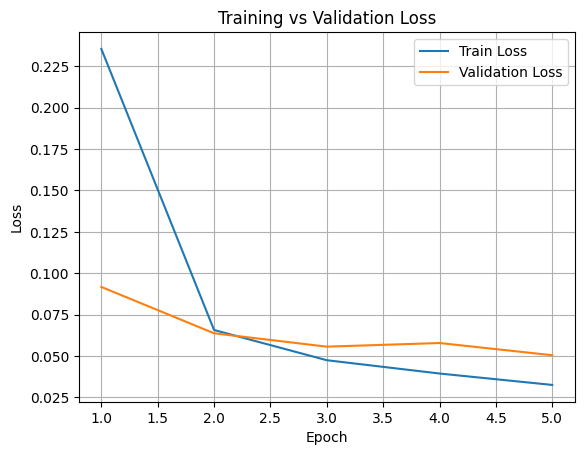

In [29]:
# # Model CNN
# conv_model = convnet()

# # Loss
# loss_fn = nn.CrossEntropyLoss()

# # Optimizer
# optimizer = torch.optim.Adam(conv_model.parameters(), lr=lr)

# #train
# conv_model = convnet()
# num_steps = len(train_loader)

# for i in range(num_epochs):
#     conv_model.train()
#     for j, (imgs, lbls) in enumerate(train_loader):
#         out = conv_model(imgs)
#         loss_val = loss_fn(out, lbls)
#         optimizer.zero_grad()
#         loss_val.backward()
#         optimizer.step()

#         if j % 2 == 0:
#             print('Epoch [{}/{}]  Step [{}/{}]  Loss [{:.4f}]'
#                   .format(i+1, num_epochs, j+1, num_steps, loss_val.item()))


#     conv_model.eval()
#     corrects = 0
#     num_steps = len(valid_loader)
#     for k, (imgs, lbls) in enumerate(valid_loader):
#         out = conv_model(imgs)
#         loss_val = loss_fn(out, lbls)
#         predicted = torch.argmax(out, 1)
#         corrects += (predicted == lbls).sum().item()
#         print('Validation, step: [{}/{}]  Loss [{:.4f}]  Accuracy [{:.4f}]'.
#               format(k+1, num_steps, loss_val.item(), corrects/num_steps))



# Initialize
model = convnet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Tracking losses
train_losses = []
valid_losses = []

# Training loop
num_steps = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for j, (imgs, labels) in enumerate(train_loader):
        out = model(imgs)
        loss = loss_fn(out, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if j % 50 == 0:
          print('epoch: [{}/{}] | step: [{}/{}] | loss: {:.6f}'
          .format(epoch+1, num_epochs, j+1, num_steps, loss))
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in valid_loader:
            out = model(imgs)
            loss = loss_fn(out, labels)
            valid_loss += loss.item()
            predicted = torch.argmax(out, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(valid_loss / len(valid_loader))
    print(f"Epoch [{epoch+1}/{num_epochs}] | Val Loss: {valid_loss/len(valid_loader):.4f} | Val Acc: {100. * correct / total:.2f}%")

# Plot losses
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Test
model.eval()
corrects = 0
total = 0

with torch.no_grad():
    for imgs, lbls in test_loader:
        out = model(imgs)
        predicted = torch.argmax(out, 1)
        corrects += (predicted == lbls).sum().item()
        total += lbls.size(0)

test_accuracy = 100. * corrects / total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")



Test Accuracy: 98.56%
